Import libraries

In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib\n",
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [5]:
#cross validation
from sklearn.model_selection import train_test_split

Import data 

In [11]:
#data
rawData = pd.read_csv('file.csv', header=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [14]:
#transform categorical attributes

rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['PAY_0'] = rawData['PAY_0'].astype('category')
rawData['PAY_2'] = rawData['PAY_2'].astype('category')
rawData['PAY_3'] = rawData['PAY_3'].astype('category')
rawData['PAY_4'] = rawData['PAY_4'].astype('category')
rawData['PAY_5'] = rawData['PAY_5'].astype('category')
rawData['PAY_6'] = rawData['PAY_6'].astype('category')
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [15]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

Regression Model: Example

In [17]:
#Select Features
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


2. Select the Dependent Variable

In [18]:
#dependent variable
depVar = rawData['PAY_AMT6']

3. Establish the training set for the X-variables or Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for your final models)

In [19]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
BILL_AMT1    1000 non-null int64
BILL_AMT2    1000 non-null int64
BILL_AMT3    1000 non-null int64
BILL_AMT4    1000 non-null int64
BILL_AMT5    1000 non-null int64
BILL_AMT6    1000 non-null int64
PAY_AMT1     1000 non-null int64
PAY_AMT2     1000 non-null int64
PAY_AMT3     1000 non-null int64
PAY_AMT4     1000 non-null int64
PAY_AMT5     1000 non-null int64
dtypes: int64(11)
memory usage: 86.1 KB


4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

In [21]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

5. Establish the testing set for the X-Variables or Feature space

In [22]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


 Establish Ground truth 

In [23]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

CROSSVALIDATION

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)



In [27]:
X_train.shape, X_test.shape



((750, 11), (250, 11))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

Sci-Kit Learn Format

In [29]:
from sklearn.linear_model import LinearRegression

Tuning Parameters and Model Definition


In [31]:
model = LinearRegression(n_jobs=10)



REGRESSION MODELS

2. Establish variables that you will use for defining each model. As you can see we've established three different models with the individual variable names; we'll refer to each when we build the model later.

In [32]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

3. While not mandatory, it is a good idea to establish a variable specifically for your features so you will have full control over what is being used for training. 

In [34]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


4. Again while not mandatory, but it might be a good idea to validate that the correct column is being used for the dependent variable:

In [35]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


5. Use the model variables you established in step 2  pass the training data to them in the following format (You used the train function from caret for this when you worked in R):

In [36]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

6. Random Forest

In [37]:
modelRF.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

7. Support Vector Regression



In [38]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

8. Linear Regression

In [39]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Choosing the Right Model

In [40]:
print(cross_val_score(modelRF, X_train, y_train)) 



[-0.00275411 -0.27588014  0.13101567 -0.06130286 -0.19918683]


In [41]:
model.score(X_train,y_train)

0.5034541939782533

1. Random Forest Regression Model Fitting and Scoring

In [42]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.00179435 -0.30811631  0.18487733 -0.1085966  -0.23658604]


0.8691193355706274

2. Support Vector Regression Model Fitting and Scoring

In [43]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.02284886 -0.0287946  -0.0601856  -0.04867841 -0.04450644]


-0.02004148805915773

3. Linear Regression Model Fitting and Scoring

In [44]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-0.08862947 -1.73076964  0.11850179 -0.47555962 -1.35999643]


0.5034541939782533

Model selected : RF

Making Predictions

In [57]:
predictions = modelRF.predict(X_test)

Evaluating the Results

In [58]:
rmse = sqrt(mean_squared_error(y_test, predictions))



In [59]:
predRsquared = r2_score(y_test,predictions)



In [60]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.049
RMSE: 27105.952


 Plotting the Results

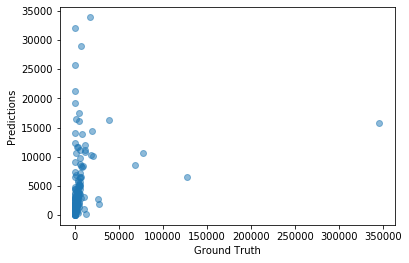

In [64]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()